In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,RepeatedKFold
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [197]:
df = pd.read_csv('ice_cream_sales.csv') # load the dataset
df # Examine the dataset
# The dataset is very simple and we will have this equation for the line :

'''
                             y = mx + c 
    y = column to be predicted (Ice Cream Profits) using the equation.
    m = slope/coeffecient/weight/tangent(theta/s) which shows how important a variable is in contributing in prediction of y. 
    (The greater the value the more important that variable(column) attached to it is).
    c = intercept value which is responsible the moving of line in x and y axis (hyperplane in higher dimensions).
'''

'''
Here we have :
                y = Ice Cream Profits
                x = Temperature
                m , c = to be calculated so we can make a relationship between them 
'''

'''
Why find the relationship ?

        Suppose in future we have a temperature and wants to predict the Ice Cream Profits , then we can use our model to predict this 
which will be based on this relation we are gonna calculate .
'''


'\nWhy find the relationship ?\n\n        Suppose in future we have a temperature and wants to predict the Ice Cream Profits , then we can use our model to predict this \nwhich will be based on this relation we are gonna calculate .\n'

In [198]:
df.info()
# As expected we have non null values as this dataset is small and already cleaned
# If not cleaned we would have had to do some outlier analysis , imputation methods and other techniques on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [199]:
df.describe() # Gives the 5 number summary

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


In [200]:
# Splitting data into X (the variables that will affect the value to be predicted) and y(the values to be predicted)
X = df[['Temperature']]
y = df['Ice Cream Profits']

In [ ]:
# You can try plotting the distrbutions and the kde plot for these variables (found to be almost normally distributed).
# In a multivaribale dataste we will be plotting data a lot before actually deep diving because certain plots
# express a lot about the variable : outlier , distribution , trends , min and max value ,etc

<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

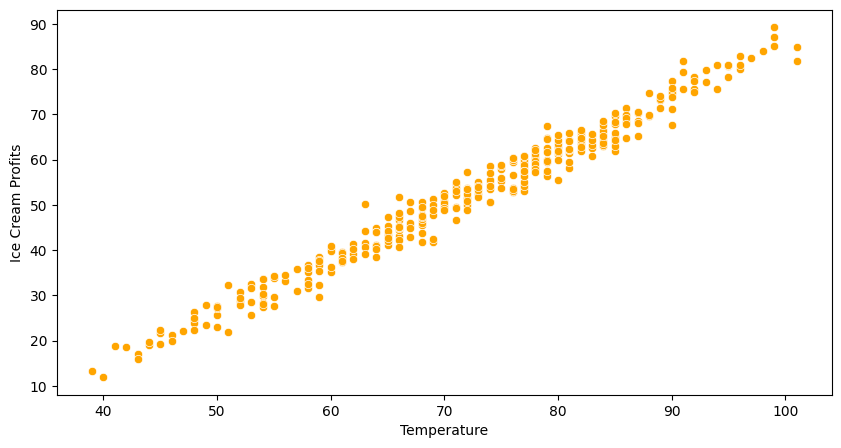

In [201]:
# Plotting the scatterplot to see what type of relation is between temperature and ice cream profits.
plt.figure(figsize=(10,5))
sns.scatterplot(
    data = df,
    x = 'Temperature', # The x features / variables
    y = 'Ice Cream Profits', # The y outputs / values to be predicted
    color = 'orange'
)
# The graph has a linear relationship so we can apply linear regression to predict ice cream profits.

In [202]:
# Now we will divide the data into training and testing sets as one training set will be used 
# for training the model where the model understand and fits it , and during the prediction phase 
# the testing set will bs used to evaluate the model's performance.

X_train , X_test , y_train ,y_test = train_test_split(
    X, # The X variables
    y, # The y column
    test_size = 0.3, # The test-train ratio ; train-test percentage split : 70-30 automatically as 0.3 is passed for test_size.
    random_state = 42 # This value is set when the split is to be reproduced 
) 

In [203]:
# Now use this subsets accordingly as the data to be passed to model below whenever needed.

In [204]:
# Now we will use the Sci-kit learn library to import different linear models and evaluate which model performs the best .

In [205]:
# Firstly using the LinearRegression model
lr = LinearRegression() # instantiate the model

In [206]:
lr.fit(X_train,y_train) # Fit with the training subset so that the model is trained and ready to be tested on some unknown values.

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [207]:
# We can examine the parameters below :
print(f'The slope m is : {lr.coef_[0]}')
print(f'The intercept c is : {lr.intercept_}')

The slope m is : 1.1873166719324824
The intercept c is : -33.499203058856644


In [208]:
# Now lets make the prediction and store it in a variable 
y_pred_lr = lr.predict(X_test) # Prediction is always done on unknown x test and then is evaluated with 
# ytest to check for accuracy,precision,r2core,etc. 

In [209]:
# Actually u might have wondered that there are many possibilities (permutations) for the selection of 
# train and test from the whole dataset .
# If for example if we break the data into 10 blocks then which block will be used for train and which 
# for test ? So cross val score does the whole process given the folds passed and the average score of the parameter
# for example 'precision' is calculated  and then we can get a better score rather than just a simple metric score on its own.

# Even the fold passed can have all the outlier in a single fold so to even average that we will be using RepeatedKfold 
# whose job is to repeat the times passed

rkf = RepeatedKFold(
                    n_splits=10, # the number of splits to be done
                    n_repeats=5, # How many times to repeat the step for each split
                    random_state=42
)

cvs_lr = cross_val_score(
    lr, # The model always passed as the first parameter
    X, # The X set
    y, # The y set
    cv = rkf # The spliting size
) # Mean of all the splits

print(f'The mean of the cvs lr : {cvs_lr.mean()}')
print(f'The std of the cvs lr : {cvs_lr.std()}')

The mean of the cvs lr : 0.9753725430668192
The std of the cvs lr : 0.0072829447784530784


In [210]:
# Lets analyze some metrics for this :
print(f'The r2score for the lr model : {r2_score(y_pred_lr,y_test)}')
print(f'The rmse for the lr model : {root_mean_squared_error(y_pred_lr,y_test)}')
print(f'The mae for the lr model : {mean_absolute_error(y_pred_lr,y_test)}')

The r2score for the lr model : 0.982109982691965
The rmse for the lr model : 2.313747714474943
The mae for the lr model : 1.8761735107267787


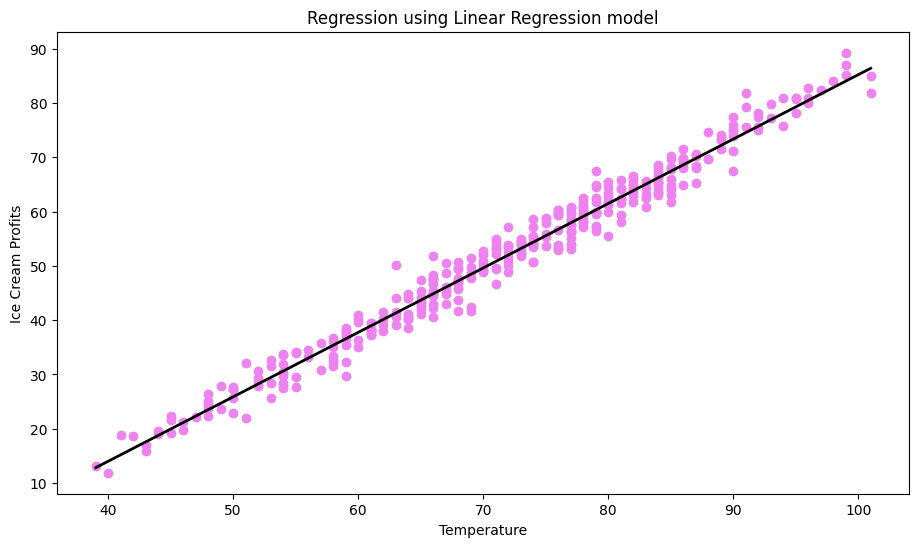

In [211]:
plt.figure(figsize=(11,6))
plt.scatter(
    df['Temperature'], 
    df['Ice Cream Profits'],
    color = 'violet'
)
plt.plot(X,
        lr.predict(X), # Predicting the whole X column as we want a whole line
        color = 'black',
        linewidth = 2
        )
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Regression using Linear Regression model')
plt.show()

In [212]:
# The model is already performing amazing but I think this is because of the data size and the simplicity of the data

In [217]:
# Now we will try applying polynomial regression on this same dataset using PolynomialFeatures